# EDA and Analysis

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Load the uploaded files
acs_income_df = pd.read_csv("ACSST1Y2023.S1902-Data.csv", skiprows=1)
income_by_place_df = pd.read_csv("ACSST1Y2023.S1903-Data.csv", skiprows=1)

## Reviewing ACSST1Y2023.S1902

In [31]:
acs_income_df.head(3).T

,0,1,2
Geography,0400000US26,0400000US39,0400000US42
Geographic Area Name,Michigan,Ohio,Pennsylvania
Estimate!!Number!!HOUSEHOLD INCOME!!All households,4107809,4917309,5324209
Margin of Error!!Number!!HOUSEHOLD INCOME!!All households,11889,10812,13443
Estimate!!Number!!HOUSEHOLD INCOME!!All households!!With earnings,3050710,3721506,4003231
...,...,...,...
Estimate!!Mean income (dollars)!!PER CAPITA INCOME BY RACE AND HISPANIC OR LATINO ORIGIN!!Total population!!Hispanic or Latino origin (of any race),26886,25712,24614
Margin of Error!!Mean income (dollars)!!PER CAPITA INCOME BY RACE AND HISPANIC OR LATINO ORIGIN!!Total population!!Hispanic or Latino origin (of any race),1167,1035,749
"Estimate!!Mean income (dollars)!!PER CAPITA INCOME BY RACE AND HISPANIC OR LATINO ORIGIN!!Total population!!White alone, not Hispanic or Latino",42549,42694,47142
"Margin of Error!!Mean income (dollars)!!PER CAPITA INCOME BY RACE AND HISPANIC OR LATINO ORIGIN!!Total population!!White alone, not Hispanic or Latino",372,347,407


In [26]:
# Show all column names
column_names = acs_income_df.columns.tolist()
column_names

['Geography',
 'Geographic Area Name',
 'Estimate!!Number!!HOUSEHOLD INCOME!!All households',
 'Margin of Error!!Number!!HOUSEHOLD INCOME!!All households',
 'Estimate!!Number!!HOUSEHOLD INCOME!!All households!!With earnings',
 'Margin of Error!!Number!!HOUSEHOLD INCOME!!All households!!With earnings',
 'Estimate!!Number!!HOUSEHOLD INCOME!!All households!!With earnings!!With wages or salary income',
 'Margin of Error!!Number!!HOUSEHOLD INCOME!!All households!!With earnings!!With wages or salary income',
 'Estimate!!Number!!HOUSEHOLD INCOME!!All households!!With earnings!!With self-employment income',
 'Margin of Error!!Number!!HOUSEHOLD INCOME!!All households!!With earnings!!With self-employment income',
 'Estimate!!Number!!HOUSEHOLD INCOME!!All households!!With interest, dividends, or net rental income',
 'Margin of Error!!Number!!HOUSEHOLD INCOME!!All households!!With interest, dividends, or net rental income',
 'Estimate!!Number!!HOUSEHOLD INCOME!!All households!!With Social Security

For this project I dont necessarily care for demogrpahic information, I only care about income and affordabilty to determine potential growth. However, since the data is already filtered in that manner I can leave it and still get the insights needed for mean income. 

In [103]:
# Select useful columns for summary
per_capita_columns = {
    "Geographic Area Name": "State",
    "Estimate!!Mean income (dollars)!!PER CAPITA INCOME BY RACE AND HISPANIC OR LATINO ORIGIN!!Total population!!One race--!!White": "White",
    "Estimate!!Mean income (dollars)!!PER CAPITA INCOME BY RACE AND HISPANIC OR LATINO ORIGIN!!Total population!!One race--!!Black or African American": "Black or African American",
    "Estimate!!Mean income (dollars)!!PER CAPITA INCOME BY RACE AND HISPANIC OR LATINO ORIGIN!!Total population!!One race--!!Asian": "Asian",
    "Estimate!!Mean income (dollars)!!PER CAPITA INCOME BY RACE AND HISPANIC OR LATINO ORIGIN!!Total population!!Hispanic or Latino origin (of any race)": "Hispanic or Latino"
}

In [105]:
# Extract and rename
per_capita_summary = acs_income_df[list(per_capita_columns.keys())].rename(columns=per_capita_columns)

In [107]:
# Convert to numeric and round for readability
for col in per_capita_summary.columns[1:]:
    per_capita_summary[col] = pd.to_numeric(per_capita_summary[col], errors="coerce").round(0).astype("Int64")

per_capita_summary

,State,White,Black or African American,Asian,Hispanic or Latino
0,Michigan,42278,26960,46724,26886
1,Ohio,42487,27246,49763,25712
2,Pennsylvania,46838,29044,49048,24614


## Reviewing ACSST1Y2023.S1903

### Median Income by State, Family vs Non-Family, and Race

In [52]:
# Load the second ACS file
acs_income_median_df = pd.read_csv("ACSST1Y2023.S1903-Data.csv", skiprows=1)

In [79]:
# Define corrected column names from the dataset
corrected_columns = {
    "Geographic Area Name": "State",
    "Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White": "White",
    "Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American": "Black or African American",
    "Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Asian": "Asian",
    "Estimate!!Median income (dollars)!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!Hispanic or Latino origin (of any race)": "Hispanic or Latino",
    "Estimate!!Median income (dollars)!!FAMILIES!!Families": "Family Households",
    "Estimate!!Median income (dollars)!!NONFAMILY HOUSEHOLDS!!Nonfamily households": "Nonfamily Households"
}

In [85]:
# Select and rename
median_income_summary = acs_income_median_df[list(corrected_columns.keys())].rename(columns=corrected_columns)

In [87]:
# Convert to numeric and round
for col in median_income_summary.columns[1:]:
    median_income_summary[col] = pd.to_numeric(median_income_summary[col], errors="coerce").round(0).astype("Int64")

median_income_summary

,State,White,Black or African American,Asian,Hispanic or Latino,Family Households,Nonfamily Households
0,Michigan,73345,44632,99146,66479,88499,41497
1,Ohio,72690,43809,95221,55841,89221,41286
2,Pennsylvania,78815,47841,99052,57743,94367,43501


In [93]:
# Set basic styles
plt.style.use("ggplot")

In [95]:
# ---- 1. Median Income by Race ----
race_cols = ["White", "Black or African American", "Asian", "Hispanic or Latino"]
race_data = median_income_summary.set_index("State")[race_cols].T

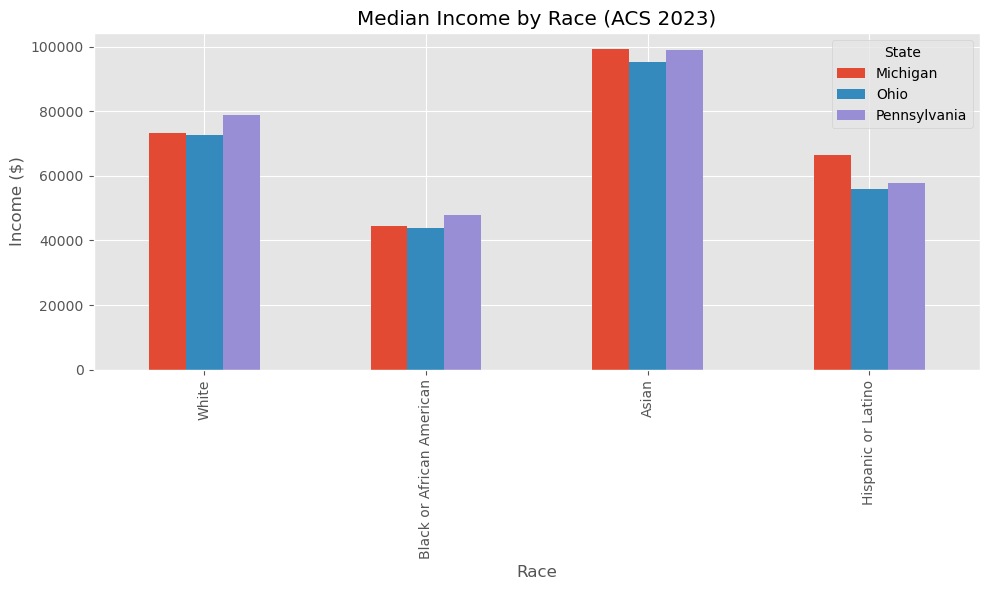

In [97]:
# Plot
race_data.plot(kind="bar", figsize=(10, 6))
plt.title("Median Income by Race (ACS 2023)")
plt.ylabel("Income ($)")
plt.xlabel("Race")
plt.legend(title="State")
plt.tight_layout()
plt.show()

In [99]:
# ---- 2. Median Income by Household Type ----
hh_cols = ["Family Households", "Nonfamily Households"]
hh_data = median_income_summary.set_index("State")[hh_cols].T

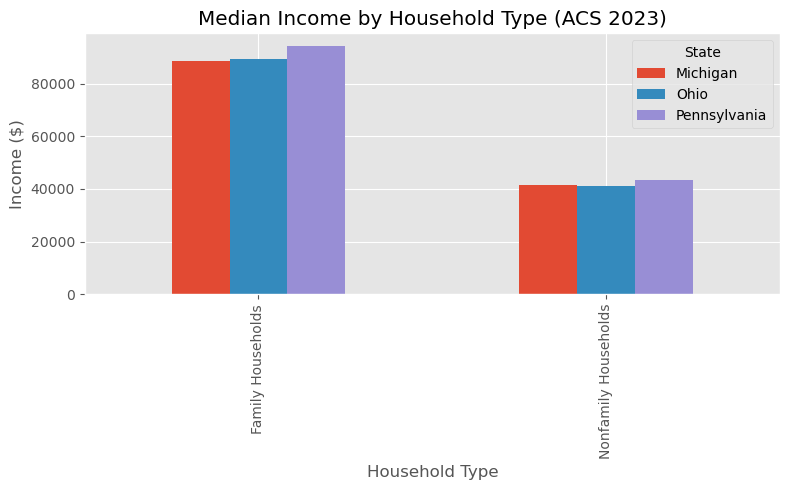

In [101]:
# Plot
hh_data.plot(kind="bar", figsize=(8, 5))
plt.title("Median Income by Household Type (ACS 2023)")
plt.ylabel("Income ($)")
plt.xlabel("Household Type")
plt.legend(title="State")
plt.tight_layout()
plt.show()

In [ ]:
# ---- 3. Overall Median Income combined races ----

In [274]:
# Calculate average of race-specific median incomes per state
combined_income = race_data.T.mean(axis=1).round(0)

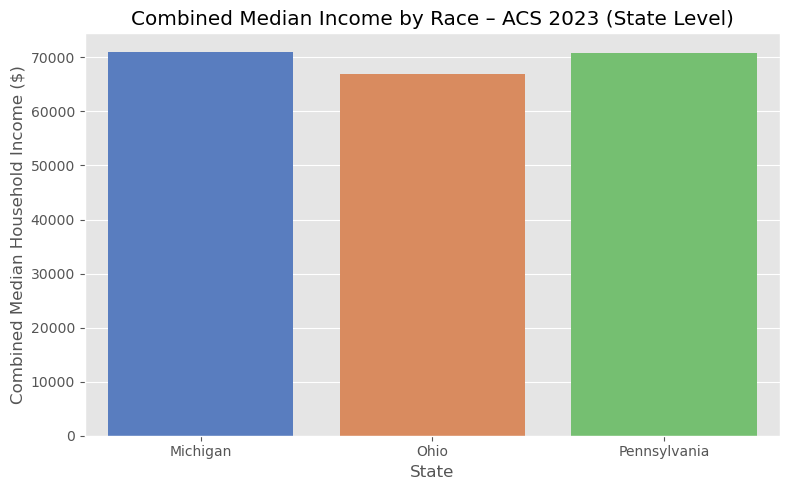

In [276]:
# Create a bar chart of the combined median income
plt.figure(figsize=(8, 5))
sns.barplot(x=combined_income.index, y=combined_income.values, palette="muted")
plt.ylabel("Combined Median Household Income ($)")
plt.title("Combined Median Income by Race – ACS 2023 (State Level)")
plt.tight_layout()
plt.show()

## Merging the two data frames for mean Per Capita review and median Household.

In [114]:
# Merge per capita mean and median household income summaries
comparison_df = per_capita_summary.merge(median_income_summary, on="State", suffixes=("_MeanPerCapita", "_MedianHousehold"))

comparison_df

,State,White_MeanPerCapita,Black or African American_MeanPerCapita,Asian_MeanPerCapita,Hispanic or Latino_MeanPerCapita,White_MedianHousehold,Black or African American_MedianHousehold,Asian_MedianHousehold,Hispanic or Latino_MedianHousehold,Family Households,Nonfamily Households
0,Michigan,42278,26960,46724,26886,73345,44632,99146,66479,88499,41497
1,Ohio,42487,27246,49763,25712,72690,43809,95221,55841,89221,41286
2,Pennsylvania,46838,29044,49048,24614,78815,47841,99052,57743,94367,43501


In [116]:
# Prepare data in long format for easy plotting
comparison_long = pd.melt(
    comparison_df,
    id_vars="State",
    var_name="Category",
    value_name="Income"
)

In [120]:
# Extract race and income type from column names
comparison_long["Race"] = comparison_long["Category"].str.extract(r'^(.*?)_')
comparison_long["Income Type"] = comparison_long["Category"].str.extract(r'_(MeanPerCapita|MedianHousehold)$')

<Figure size 1200x600 with 0 Axes>

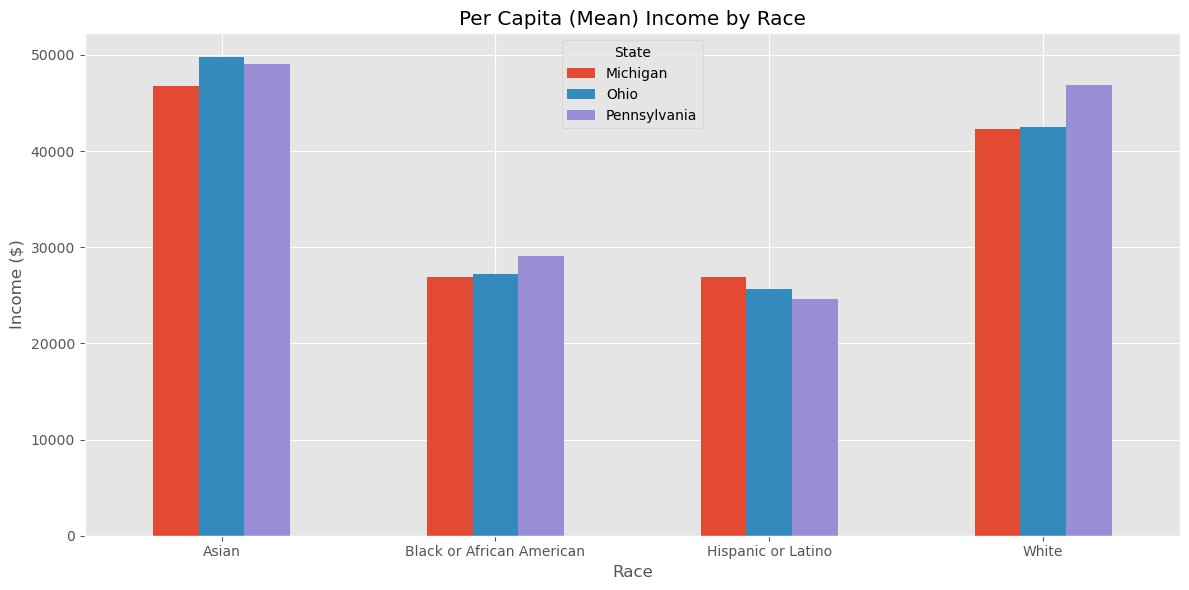

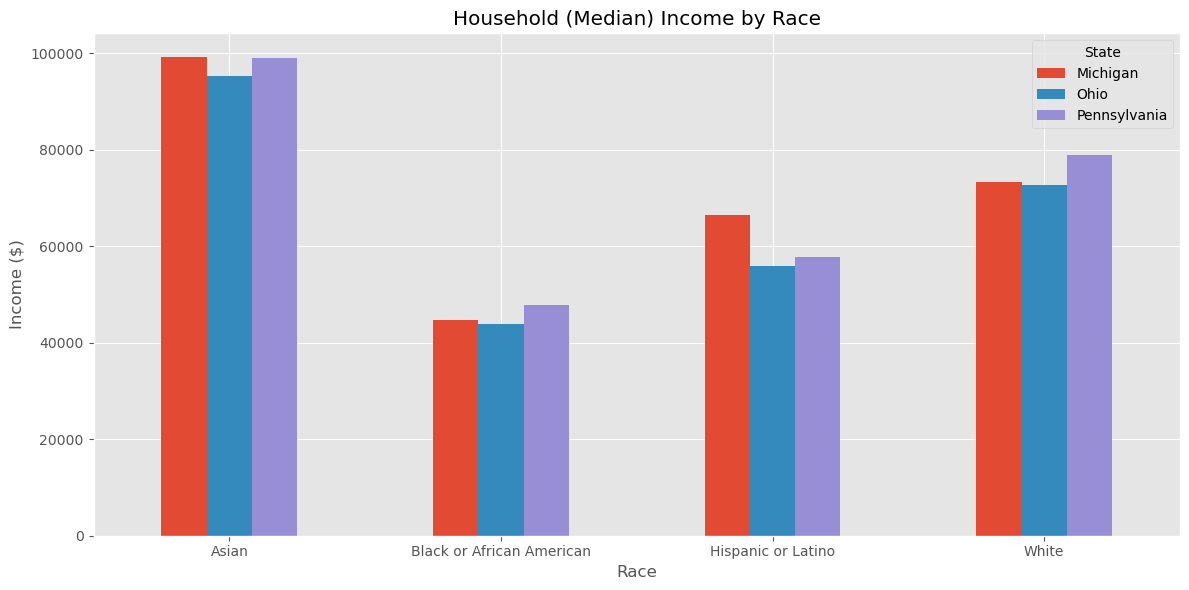

In [122]:
# Create grouped bar chart
plt.figure(figsize=(12, 6))
for income_type in ["MeanPerCapita", "MedianHousehold"]:
    subset = comparison_long[comparison_long["Income Type"] == income_type]
    pivot = subset.pivot(index="Race", columns="State", values="Income")
    pivot.plot(kind="bar", figsize=(12, 6), title=f"{income_type.replace('MeanPerCapita', 'Per Capita (Mean)').replace('MedianHousehold', 'Household (Median)')} Income by Race")
    plt.ylabel("Income ($)")
    plt.xlabel("Race")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.legend(title="State")
    plt.show()

## Zillow Data Review

In [131]:
home_income_needed_df = pd.read_csv("Metro_new_homeowner_income_needed_downpayment_0.20_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
home_price_df = pd.read_csv("Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv")

In [133]:
home_income_needed_df.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,...,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30
0,102001,0,United States,country,NaN,37514.113879,37443.974034,37686.713888,37641.907614,37413.529554,...,98467.282352,95840.416918,93779.944878,95821.967036,98871.966533,98355.997911,100427.609199,99646.819920,98085.314196,98536.573449
1,394913,1,"New York, NY",msa,NY,97688.491502,97306.167835,97747.730807,97577.626017,97018.512671,...,195278.286116,191301.601012,188134.118976,192670.409661,198977.491274,198151.970870,202075.365058,200727.353001,198356.800177,200152.110766
2,753899,2,"Los Angeles, CA",msa,CA,77696.296562,77206.703066,77145.425659,76383.100485,75398.962398,...,246491.002381,240651.204866,235985.685410,242358.309633,251376.382859,250505.217406,255806.156630,252837.175670,247505.189098,247982.355686


In [135]:
home_price_df.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30
0,102001,0,United States,country,NaN,124397.545153,124609.748900,124873.040706,125438.501055,126089.375728,...,3.656954e+05,3.659891e+05,3.664920e+05,3.671549e+05,3.677465e+05,3.685688e+05,3.692755e+05,3.697865e+05,3.695374e+05,3.690399e+05
1,394913,1,"New York, NY",msa,NY,222850.137861,223792.044794,224739.262974,226655.041728,228628.825913,...,7.033239e+05,7.070718e+05,7.113336e+05,7.152540e+05,7.181908e+05,7.198386e+05,7.206852e+05,7.219450e+05,7.237650e+05,7.266368e+05
2,753899,2,"Los Angeles, CA",msa,CA,240464.212781,241381.908412,242576.556368,244957.433686,247541.318983,...,1.026388e+06,1.032245e+06,1.039446e+06,1.045433e+06,1.050661e+06,1.055384e+06,1.056097e+06,1.053898e+06,1.048431e+06,1.043903e+06


In [161]:
# Filter to only OH, PA, MI using both StateName and RegionName
target_states = ["OH", "PA", "MI"]

filtered_prices = home_price_df[
    (home_price_df["StateName"].isin(target_states)) &
    (~home_price_df["RegionName"].str.contains(", WV", case=False))
].copy()

filtered_income_needed = home_income_needed_df[
    (home_income_needed_df["StateName"].isin(target_states)) &
    (~home_income_needed_df["RegionName"].str.contains(", WV", case=False))
].copy()

In [163]:
# Select April 2025 as the latest data point for comparison
latest_month = "2025-04-30"

In [165]:
# Merge the two datasets on RegionName and StateName
merged_city_data = pd.merge(
    filtered_prices[["RegionName", "StateName", latest_month]],
    filtered_income_needed[["RegionName", "StateName", latest_month]],
    on=["RegionName", "StateName"],
    suffixes=("_HomePrice", "_IncomeNeeded")
)

In [167]:
# Calculate affordability ratio: income needed / home price
merged_city_data["Affordability_Ratio"] = merged_city_data[f"{latest_month}_IncomeNeeded"] / merged_city_data[f"{latest_month}_HomePrice"]

The affordability ratio is the (Income Needed) ÷ (Home Price). 

In [170]:
# Clean up column names
merged_city_data = merged_city_data.rename(columns={
    f"{latest_month}_HomePrice": "Home Price (Apr 2025)",
    f"{latest_month}_IncomeNeeded": "Income Needed (Apr 2025)"
})

In [172]:
# Sort and get top 10 most affordable metros (lowest ratio)
top_affordable_cities = merged_city_data.sort_values("Affordability_Ratio").head(20)
top_affordable_cities

,RegionName,StateName,Home Price (Apr 2025),Income Needed (Apr 2025),Affordability_Ratio
4,"Columbus, OH",OH,347889.377527,82998.772997,0.238578
3,"Cincinnati, OH",OH,309531.241082,77460.110670,0.250250
30,"Traverse City, MI",MI,418107.285705,104980.055278,0.251084
19,"Ann Arbor, MI",MI,429978.803281,109974.413006,0.255767
6,"Grand Rapids, MI",MI,348020.685134,91738.826321,0.263602
29,"Monroe, MI",MI,255771.145104,69367.585711,0.271210
42,"Bloomsburg, PA",PA,239302.264986,64904.368115,0.271223
26,"State College, PA",PA,345259.184547,93678.421916,0.271328
28,"Niles, MI",MI,260030.637961,71032.495628,0.273170
12,"Lancaster, PA",PA,372644.035416,101812.418880,0.273216


In [174]:
# Sort by affordability and get top 10 again
top20_affordable_cleaned = valid_city_data.sort_values("Affordability_Ratio").head(20)

In [176]:
# Regenerate the chart
sorted_cleaned = top20_affordable_cleaned.sort_values("Affordability_Ratio")

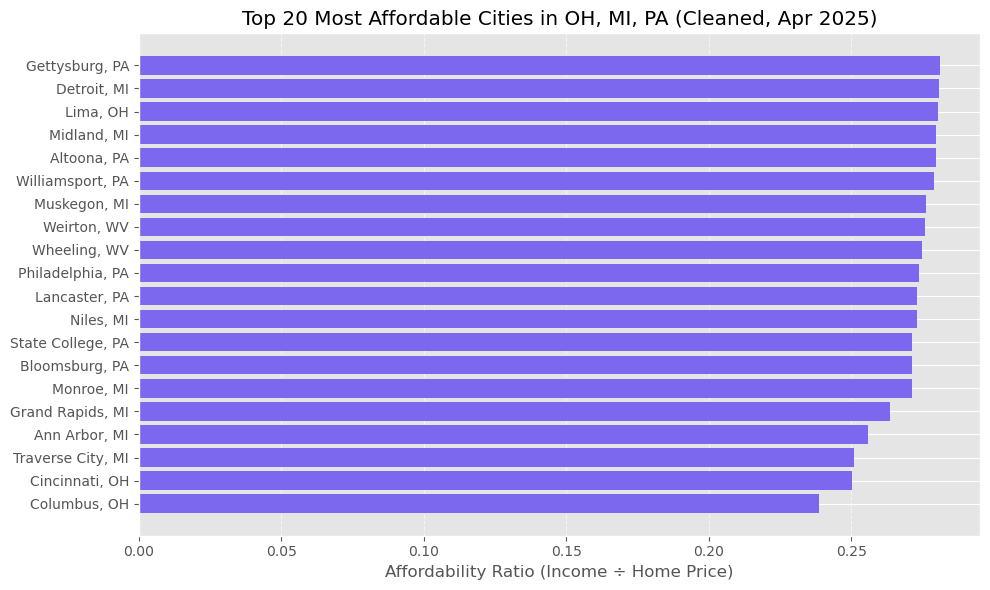

In [178]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_cleaned["RegionName"], sorted_cleaned["Affordability_Ratio"], color="mediumslateblue")
plt.xlabel("Affordability Ratio (Income ÷ Home Price)")
plt.title("Top 20 Most Affordable Cities in OH, MI, PA (Cleaned, Apr 2025)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## Logistic Regression Model 

### Preparing the data for the model

In [182]:
price_df = pd.read_csv("Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv")
income_df = pd.read_csv("Metro_new_homeowner_income_needed_downpayment_0.20_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

In [184]:
# Filter for target states and exclude any WV overlap
target_states = ["OH", "PA", "MI"]
price_df = price_df[(price_df["StateName"].isin(target_states)) & (~price_df["RegionName"].str.contains(", WV", case=False))]
income_df = income_df[(income_df["StateName"].isin(target_states)) & (~income_df["RegionName"].str.contains(", WV", case=False))]

In [186]:
# Define the months to use as features
feature_months = ["2025-01-31", "2025-02-28", "2025-03-31", "2025-04-30"]

In [188]:
# Subset and merge
price_features = price_df[["RegionName", "StateName"] + feature_months].copy()
income_features = income_df[["RegionName", "StateName"] + feature_months].copy()
merged = pd.merge(price_features, income_features, on=["RegionName", "StateName"], suffixes=("_price", "_income"))

In [192]:
# Calculate affordability ratios for each month
for month in feature_months:
    merged[f"afford_ratio_{month}"] = merged[f"{month}_income"] / merged[f"{month}_price"]

In [194]:
# Define the classification target: was the city in the top 20 most affordable in April 2025?
merged["target"] = merged[f"afford_ratio_2025-04-30"].rank(ascending=True) <= 20
merged["target"] = merged["target"].astype(int)

In [196]:
# Features for training: ratios for Jan–Mar 2025
X = merged[[f"afford_ratio_{m}" for m in ["2025-01-31", "2025-02-28", "2025-03-31"]]]
y = merged["target"]

In [198]:
X.head(), y.value_counts()

(   afford_ratio_2025-01-31  afford_ratio_2025-02-28  afford_ratio_2025-03-31
 0                 0.278635                 0.276217                 0.272243
 1                 0.285923                 0.283398                 0.279326
 2                 0.288744                 0.286333                 0.282329
 3                 0.255157                 0.252707                 0.248744
 4                 0.243253                 0.240901                 0.237079,
 target
 0    24
 1    20
 Name: count, dtype: int64)

### Building the Model

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [205]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [209]:
# Predict and evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

C:\Users\rbrio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rbrio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rbrio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


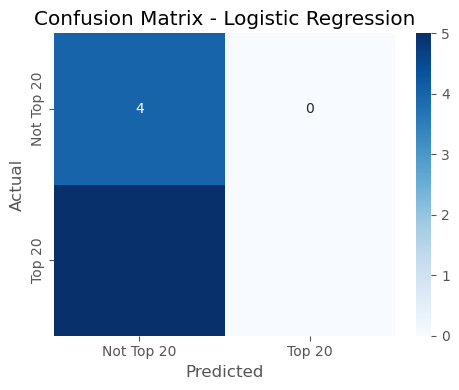

In [211]:
# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Top 20", "Top 20"], yticklabels=["Not Top 20", "Top 20"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

In [213]:
report

{'0': {'precision': 0.4444444444444444,
  'recall': 1.0,
  'f1-score': 0.6153846153846153,
  'support': 4},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5},
 'accuracy': 0.4444444444444444,
 'macro avg': {'precision': 0.2222222222222222,
  'recall': 0.5,
  'f1-score': 0.30769230769230765,
  'support': 9},
 'weighted avg': {'precision': 0.19753086419753085,
  'recall': 0.4444444444444444,
  'f1-score': 0.2735042735042735,
  'support': 9}}

This model performed more poorly than I would have thought. With 5 actually in the top 20 and 4 not while predicting 0 and 0. 

## Random Forest Model Build

In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [219]:
# Re-split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [223]:
# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

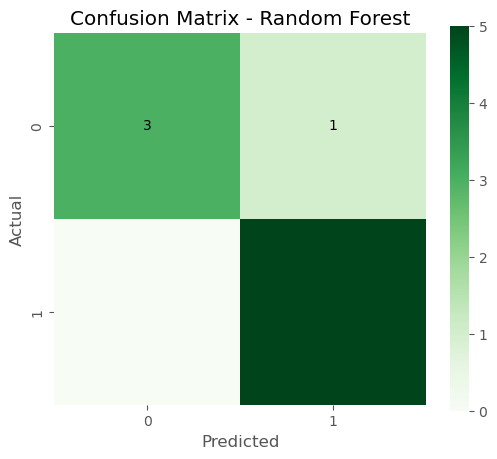

In [251]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', square=True,
            annot_kws={"color": "black"}, ax=ax)

ax.set_title("Confusion Matrix - Random Forest")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

# Save after rendering
plt.savefig("confusion_matrix_rf.png", bbox_inches='tight')
plt.show()

In [249]:
plt.savefig("confusion_matrix.png", bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [227]:
rf_report

{'0': {'precision': 1.0,
  'recall': 0.75,
  'f1-score': 0.8571428571428571,
  'support': 4},
 '1': {'precision': 0.8333333333333334,
  'recall': 1.0,
  'f1-score': 0.9090909090909091,
  'support': 5},
 'accuracy': 0.8888888888888888,
 'macro avg': {'precision': 0.9166666666666667,
  'recall': 0.875,
  'f1-score': 0.8831168831168831,
  'support': 9},
 'weighted avg': {'precision': 0.9074074074074076,
  'recall': 0.8888888888888888,
  'f1-score': 0.886002886002886,
  'support': 9}}

## Random Forest Predictions

In [262]:
# Reconstruct X_future with Feb–Apr affordability ratios
X_future = merged[[
    "afford_ratio_2025-02-28",
    "afford_ratio_2025-03-31",
    "afford_ratio_2025-04-30"
]].copy()

In [264]:
# Rename columns to match what the model was trained on
X_future.columns = ["afford_ratio_2025-01-31", "afford_ratio_2025-02-28", "afford_ratio_2025-03-31"]

In [266]:
# Predict using the trained Random Forest model
predicted_top20_may = rf_model.predict(X_future)

In [268]:
# Attach predictions to city names
results = merged[["RegionName", "StateName"]].copy()
results["Predicted_Top20_May2025"] = predicted_top20_may

In [270]:
# Filter only predicted Top 20
top20_predicted_cities = results[results["Predicted_Top20_May2025"] == 1].reset_index(drop=True)

In [272]:
top20_predicted_cities

,RegionName,StateName,Predicted_Top20_May2025
0,"Philadelphia, PA",PA,1
1,"Detroit, MI",MI,1
2,"Pittsburgh, PA",PA,1
3,"Cincinnati, OH",OH,1
4,"Columbus, OH",OH,1
5,"Grand Rapids, MI",MI,1
6,"Allentown, PA",PA,1
7,"Lancaster, PA",PA,1
8,"Reading, PA",PA,1
9,"Ann Arbor, MI",MI,1
